## Time Series Prediction using LSTM

### Download Data
Link: https://datamarket.com/data/set/2324/daily-minimum-temperatures-in-melbourne-australia-1981-1990#!ds=2324&display=line

#### Description
Daily minimum temperatures in Melbourne, Australia, 1981-1990

Units: Degrees Celcius

#### Steps before loading
- Rename the column name with temprature values to "Temprature"
- In the last, there is one extra row in the data, remove it by opening the file and save it again.
- There are some values in Temprature column which have a "?" before them, they will give error, remove "?" before them and save the file
- If you don't want to do these steps, just load the data file given by Great Learning.

#### Mount google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


#### Change your present working directory

In [0]:
import os
os.chdir('/content/drive/My Drive')

In [3]:
os.getcwd()

'/content/drive/My Drive'

### Load your data file

In [0]:
import pandas as pd
DF = pd.read_csv('/content/drive/My Drive/minimum_temperature.csv')

In [5]:
DF.head(10)

,Date,Temperature
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
5,1981-01-06,15.8
6,1981-01-07,15.8
7,1981-01-08,17.4
8,1981-01-09,21.8
9,1981-01-10,20.0


In [0]:
DF1 = DF.copy()

#### Plot data

Text(0.5, 1.0, 'Time-series graph for Temperature')

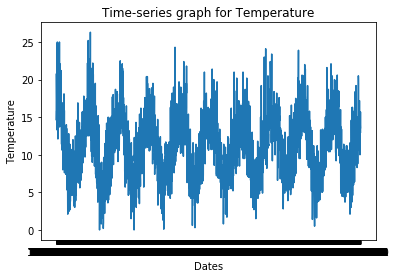

In [7]:
import matplotlib.pyplot as plt

plt.plot(DF1['Date'],DF1['Temperature'])
plt.xlabel('Dates')
plt.ylabel('Temperature')
plt.title('Time-series graph for Temperature')

#### Descibe your dataframe

In [8]:
DF1.describe()

,Temperature
count,3650.000000
mean,11.177753
std,4.071837
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


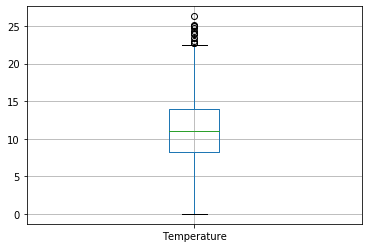

In [9]:
DF1.boxplot(column='Temperature')

#### Check for null values

In [10]:
DF1.isnull().sum()

Date           0
Temperature    0
dtype: int64

#### Drop null values

In [0]:
#There are no null values. 

#### Get the representation of the distribution of data in the form of histogram

(array([ 53., 181., 564., 862., 830., 670., 347., 102.,  32.,   9.]),
 array([ 0.  ,  2.63,  5.26,  7.89, 10.52, 13.15, 15.78, 18.41, 21.04,
        23.67, 26.3 ]),
 <a list of 10 Patch objects>)

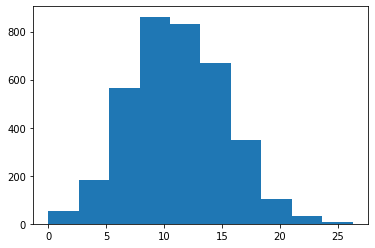

In [12]:
plt.hist(DF1['Temperature'])

#### Check the maximum and minimum values

In [13]:
print("The maximum value is:", DF1.max())
print("The minimum value is:", DF1.min())

The maximum value is: Date           1990-12-31
Temperature          26.3
dtype: object
The minimum value is: Date           1981-01-01
Temperature             0
dtype: object


### Normalize the data

In [0]:

DF1.drop(columns = 'Date', inplace = True)

In [15]:
DF1.shape

(3650, 1)

In [0]:
import numpy as np

In [0]:
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()

DF1 = scale.fit_transform(DF1)

#### Check the maximum and minimum values of scaled data

In [18]:
print("The maximum value is:", DF1.max())
print("The minimum value is:", DF1.min())

The maximum value is: 1.0
The minimum value is: 0.0


#### Look into some of the scaled values

In [19]:
DF1

array([[0.78707224],
       [0.68060837],
       [0.7148289 ],
       ...,
       [0.51330798],
       [0.59695817],
       [0.49429658]])

In [20]:
DF1.shape

(3650, 1)

### Split data into Training and Testing

In [21]:
a = int(len(DF1)*0.7)
print(a)

2555


In [0]:
for i in range(a):
   train_set = DF1[:i,:]
   test_set = DF1[len(train_set):,:]

In [23]:
train_set

array([[0.78707224],
       [0.68060837],
       [0.7148289 ],
       ...,
       [0.53992395],
       [0.54372624],
       [0.50570342]])

In [24]:
test_set

array([[0.63498099],
       [0.58174905],
       [0.54372624],
       ...,
       [0.51330798],
       [0.59695817],
       [0.49429658]])

#### Print train and test size

In [25]:
train_set.size

2554

In [26]:
train_set.shape

(2554, 1)

In [27]:
test_set.size

1096

In [28]:
test_set.shape

(1096, 1)

## Create the sequential data
Map the temprature at a particular time t to the temprature at time t+n, where n is any number you define.

For example: to map tempratures of consecutive days, use t+1, i.e. loop_back = 1

#### Define your function to create dataset

In [0]:
#Window: How long the sequence will be

def create_dataset(dataset, window=1):
    
    dataX, dataY = [], []
    
    for i in range(len(dataset)-window):
        
        b = dataset[i:(i+window), 0]        
        dataX.append(b)
        dataY.append(dataset[i + window, 0])
    
    return np.array(dataX), np.array(dataY)

In [0]:
X_train, y_train = create_dataset(train_set, 1)
X_test, y_test = create_dataset(test_set, 1)

#### Use function to get training and test set

#### Transform the prepared train and test input data into the expected structure using numpy.reshape()

In [0]:
x_train = np.reshape(X_train,(X_train.shape[0],1,1))
x_test = np.reshape(X_test,(X_test.shape[0],1,1))

## Define Model

### Define sequntial model, add LSTM layer and compile the model

In [32]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,LSTM,BatchNormalization

Seq = Sequential()
Seq.add(LSTM(32,input_shape=(1,1)))
Seq.add(BatchNormalization())
Seq.add(Dense(1))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
Seq.compile(optimizer = 'adam',loss = 'mse')

### Summarize your model

In [34]:
Seq.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 32)                4352      
_________________________________________________________________
batch_normalization (BatchNo (None, 32)                128       
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 4,513
Trainable params: 4,449
Non-trainable params: 64
_________________________________________________________________


### Train the model

In [35]:
Seq.fit(x_train,y_train,validation_data = (x_test, y_test), epochs = 100)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 2553 samples, validate on 1095 samples
Epoch 1/100
2553/2553 [==============================] - 1s 416us/sample - loss: 0.0486 - val_loss: 0.0217
Epoch 2/100
2553/2553 [==============================] - 0s 122us/sample - loss: 0.0106 - val_loss: 0.0211
Epoch 3/100
2553/2553 [==============================] - 0s 120us/sample - loss: 0.0107 - val_loss: 0.0197
Epoch 4/100
2553/2553 [==============================] - 0s 126us/sample - loss: 0.0107 - val_loss: 0.0196
Epoch 5/100
2553/2553 [==============================] - 0s 125us/sample - loss: 0.0105 - val_loss: 0.0166
Epoch 6/100
2553/2553 [==============================] - 0s 136us/sample - loss: 0.0105 - val_loss: 0.0156
Epoch 7/100
2553/2553 [==============================] - 0s 125us/sample - loss: 0.0106 - val_loss: 0.0154
Epoch 8/100
2553/2553 [==============================] - 0s 130us/sample - loss: 0.0106 - val_loss: 0.0128
Ep

## Make Predictions and Evaluate your model

In [0]:
y_pred = Seq.predict(x_test)

In [37]:
y_pred

array([[0.56862974],
       [0.5324868 ],
       [0.50614923],
       ...,
       [0.48745656],
       [0.48476914],
       [0.54290074]], dtype=float32)

In [0]:
y_pred = scale.inverse_transform(y_pred)

## Plot the results

In [0]:
DF.drop(columns = 'Date', inplace = True)

In [0]:
DF

In [0]:
DF2 = DF.iloc[2554:,:]

In [0]:
DF2.reset_index(drop = True, inplace = True)

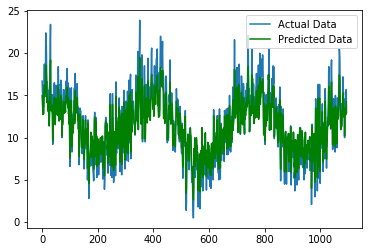

In [47]:
plt.plot(DF2)
plt.plot(y_pred,'g')
plt.legend(('Actual Data','Predicted Data'))